# 🔹 Model Experiments

## 1. Import Libraries and Setup Environment

In [5]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Set the project root directory
project_root = '/home/mfourier/ufc-predictor'

# Import Models
sys.path.append(os.path.join(project_root, 'src/models'))
import model_factory

# Import Metrics
sys.path.append(os.path.join(project_root, 'utils'))
from metrics import validate_model

## 2. Load Data

In [6]:
# Set the project root directory
project_root = '/home/mfourier/ufc-predictor'
sys.path.append(os.path.join(project_root, 'data/random'))
import random_data

In [7]:
# Load data
df_train, df_test = random_data.random_ufc_data()

# Separate training and testing sets
X_train = df_train.iloc[:, :-1]  # Todas las columnas excepto la última
y_train = df_train.iloc[:, -1]   # Solo la última columna

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

## 3. Validation

In [8]:
# 🔹 Get the KNN model from the model factory
knn_model = model_factory.get_model('knn', X_train, y_train)

# 🔹 Prediction with the KNN model
y_pred = knn_model.predict(X_test)

# 🔹 Model evaluation using F1 score and other metrics through 'validate_model'
accuracy, f1 = validate_model(knn_model, X_test, y_test)

Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.5200, F1: 0.5676


## 4. Confusion Matrices


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46        97
           1       0.53      0.61      0.57       103

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



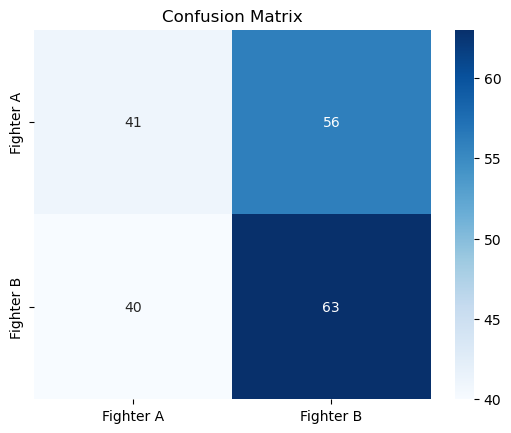

In [9]:
# 🔹 Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fighter A", "Fighter B"], yticklabels=["Fighter A", "Fighter B"])
plt.title("Confusion Matrix")
plt.show()